# 3: Is there a correlation between daily activity levels and average heart rate?

#### We understand activity levels to be defined by a mixture of the following:

    -Calories burnt

    -Distance travelled

    -Steps walked
    
    -Minutes active

WHO defines physical activity as any bodily movement produced by skeletal muscles that require energy expenditure. Physical activity refers to all movement including during leisure time, for transport to get to and from places, or as part of a person’s work.

#### How could activity levels be related two heartrate:

    1. People who exercise their bodies every day may have a healthier heart but still have a high heartrate on average because while they are performing any physical activity, their pulse rises significantly, affecting the mean.

    2. People who do little exercise could also have very high heartrate since performing any activity like walking home may require a bigger effort for their heart.

#### Goal of the section

The goal of this section is to perform an analysis on heartrate and on physical activity per day to evaluate if there is relation between activity level and heartrate.
Firstly, the correlation between heartrate and all other variables will be tested individually, and, in case there is no satisfactory results on the correlation coefficient obtained, a model will be implemented to see if heartrate can be determined/predicted by a composition of some of these features.

The following modules are employed:

In [156]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Read required files:

In [157]:
daily_activity = pd.read_csv("dailyActivity_merged.csv")
heartrate_seconds = pd.read_csv("heartrate_seconds_merged.csv")

## 3.1: Data analysis

### 3.1.1: Analysis of daily_activity

In [3]:
daily_activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


#### Summary of the statistics regarding the dataset:

In [4]:
daily_activity.describe()


,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


There are several things to consider regarding these statistics:

    1. Max values differ significantly from the 75% quantiles for all features.
    This is due to quantiles being computed with averages, so, despite most people (75%) might be below some value for a certain feature, the maximum value recorded for such feature does not take into account percentiles, making the difference considerably large.

    2. Features regarding sedentary minutes and total steps have a very high standard deviation.
    
    3. Some features barely have values, especially the feature LoggedActivitiesDistance has zeros in most of its entries, resulting in such abnormal statistics.

#### Number of users in the dataset and entries per user:

In [5]:
print("Daily Activity Dataset:", daily_activity.Id.nunique(), "unique users")
print('---------------------------------------------------------------')
print(daily_activity['Id'].value_counts())

Daily Activity Dataset: 33 unique users
---------------------------------------------------------------
Id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64


#### Duration of data collection, shape of the dataframe and type of the features:

In [6]:
print("Data in this file was collected from", daily_activity['ActivityDate'].min(), "to", daily_activity['ActivityDate'].max())
print('---------------------------------------------------------------')
print("Shape of Daily Activity:", daily_activity.shape)
print('---------------------------------------------------------------')
print(daily_activity.dtypes)

Data in this file was collected from 4/12/2016 to 5/9/2016
---------------------------------------------------------------
Shape of Daily Activity: (940, 15)
---------------------------------------------------------------
Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object


All of the features are of type int64 or float64 except for ActivityDate, which will not be a problem.

#### Check for null values and duplicates:

In [7]:
print("Daily Activity Dataset has", daily_activity.isnull().values.sum(), "missing values")
print('---------------------------------------------------------------')
print("Duplicates in Daily Acitivity: ", daily_activity.duplicated().head())

Daily Activity Dataset has 0 missing values
---------------------------------------------------------------
Duplicates in Daily Acitivity:  0    False
1    False
2    False
3    False
4    False
dtype: bool


The dataset does not contain any null values or duplicates.

### 3.1.2: Analysis of heartrate_seconds:

In [8]:
heartrate_seconds.head(10)

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101
5,2022484408,4/12/2016 7:22:05 AM,95
6,2022484408,4/12/2016 7:22:10 AM,91
7,2022484408,4/12/2016 7:22:15 AM,93
8,2022484408,4/12/2016 7:22:20 AM,94
9,2022484408,4/12/2016 7:22:25 AM,93


#### Summary of the statistics regarding the dataset:

In [9]:
pd.set_option('display.float_format', '{:.2f}'.format)
print(heartrate_seconds.describe())
pd.reset_option('display.float_format')

                 Id      Value
count    2483658.00 2483658.00
mean  5513764629.27      77.33
std   1950223760.95      19.40
min   2022484408.00      36.00
25%   4388161847.00      63.00
50%   5553957443.00      73.00
75%   6962181067.00      88.00
max   8877689391.00     203.00


#### Number of users in the dataset and entries per user:

In [10]:
print("Heartrate seconds has:", heartrate_seconds.Id.nunique(), "unique users")
print('---------------------------------------------------------------')
print(heartrate_seconds['Id'].value_counts())

Heartrate seconds has: 14 unique users
---------------------------------------------------------------
Id
4020332650    285461
6962181067    266326
5553957443    255174
4388161847    249748
5577150313    248560
8877689391    228841
4558609924    192168
6117666160    158899
2022484408    154104
2347167796    152683
7007744171    133592
8792009665    122841
6775888955     32771
2026352035      2490
Name: count, dtype: int64


#### Duration of data collection, shape of the dataframe and type of the features:

In [11]:
print("Data in this file was collected from", heartrate_seconds['Value'].min(), "to", heartrate_seconds['Value'].max())
print('---------------------------------------------------------------')
print("Shape of Heartrate sconds:", heartrate_seconds.shape)
print('---------------------------------------------------------------')
print(heartrate_seconds.dtypes)

Data in this file was collected from 36 to 203
---------------------------------------------------------------
Shape of Heartrate sconds: (2483658, 3)
---------------------------------------------------------------
Id        int64
Time     object
Value     int64
dtype: object


#### Check for null values and duplicates:

In [12]:
print("Daily Activity Dataset has", daily_activity.isnull().values.sum(), "missing values")
print('---------------------------------------------------------------')
print("Duplicates in Daily Acitivity: ", daily_activity.duplicated().head())

Daily Activity Dataset has 0 missing values
---------------------------------------------------------------
Duplicates in Daily Acitivity:  0    False
1    False
2    False
3    False
4    False
dtype: bool


The dataset does not contain any null values or duplicates.

## 3.2: Correlation study

### 3.2.1: Prepare merged dataset

In [18]:
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])
heartrate_seconds['Time'] = pd.to_datetime(heartrate_seconds['Time'])
heartrate_seconds['date'] = heartrate_seconds['Time'].dt.date

daily_avg_heartrate = heartrate_seconds.groupby(['Id', 'date'])['Value'].mean().reset_index()
daily_avg_heartrate.rename(columns={'Value': 'AvgHeartrate'}, inplace=True)
daily_avg_heartrate['date'] = pd.to_datetime(daily_avg_heartrate['date'])

daily_activity_and_heartrate = pd.merge(daily_activity, daily_avg_heartrate, left_on=['Id', 'ActivityDate'], right_on=['Id', 'date'])
daily_activity_and_heartrate.drop(columns=['date'], inplace=True)

daily_activity_and_heartrate.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,AvgHeartrate
0,2022484408,2016-04-12,11875,8.34,8.34,0.0,3.31,0.77,4.26,0.0,42,14,227,1157,2390,75.804177
1,2022484408,2016-04-13,12024,8.50,8.50,0.0,2.99,0.10,5.41,0.0,43,5,292,1100,2601,80.337584
2,2022484408,2016-04-14,10690,7.50,7.50,0.0,2.48,0.21,4.82,0.0,32,3,257,1148,2312,72.628597
3,2022484408,2016-04-15,11034,8.03,8.03,0.0,1.94,0.31,5.78,0.0,27,9,282,1122,2525,80.437382
4,2022484408,2016-04-16,10100,7.09,7.09,0.0,3.15,0.55,3.39,0.0,41,11,151,1237,2177,75.960547


The following checks if a new feature ActiveDistance = VeryActiveDistance + ModeratelyActiveDistance + LightActiveDistance should be included or not. This is done by checking if daily SedentaryActiveDistance has a relevant weight.
Simirlarly, this also checks the impact of LoggedActivitiesDistance

In [158]:
print(daily_activity_and_heartrate['SedentaryActiveDistance'].sum()/len(daily_activity_and_heartrate))
print(daily_activity_and_heartrate['LoggedActivitiesDistance'].sum()/len(daily_activity_and_heartrate))

0.0016766467081483253
0.20083770030986764


The output of the cell above shows that SedentaryActiveDistance is not very relevant, a feature ActiveDistance will not be created and SedentaryActiveDistance will be ignored due to its low impact.

LoggedActivities, despite having many zeros on its entries will be included in the model since it still has an average of 200 daily meters.

### Creation of new features and ratios:

In [159]:
daily_activity_and_heartrate['TotalActiveMinutes'] = daily_activity_and_heartrate['VeryActiveMinutes'] + daily_activity_and_heartrate['FairlyActiveMinutes'] + daily_activity_and_heartrate['LightlyActiveMinutes']
daily_activity_and_heartrate['ActivityRatio'] = daily_activity_and_heartrate['TotalActiveMinutes'] / (daily_activity_and_heartrate['TotalActiveMinutes'] + daily_activity_and_heartrate['SedentaryMinutes'])

daily_activity_and_heartrate.head()


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,AvgHeartrate,TotalActiveMinutes,ActivityRatio
0,2022484408,2016-04-12,11875,8.34,8.34,0.0,3.31,0.77,4.26,0.0,42,14,227,1157,2390,75.804177,283,0.196528
1,2022484408,2016-04-13,12024,8.50,8.50,0.0,2.99,0.10,5.41,0.0,43,5,292,1100,2601,80.337584,340,0.236111
2,2022484408,2016-04-14,10690,7.50,7.50,0.0,2.48,0.21,4.82,0.0,32,3,257,1148,2312,72.628597,292,0.202778
3,2022484408,2016-04-15,11034,8.03,8.03,0.0,1.94,0.31,5.78,0.0,27,9,282,1122,2525,80.437382,318,0.220833
4,2022484408,2016-04-16,10100,7.09,7.09,0.0,3.15,0.55,3.39,0.0,41,11,151,1237,2177,75.960547,203,0.140972


#### Distribution of features:

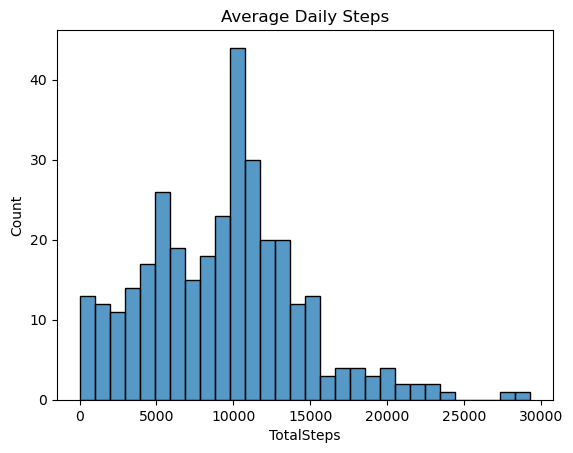

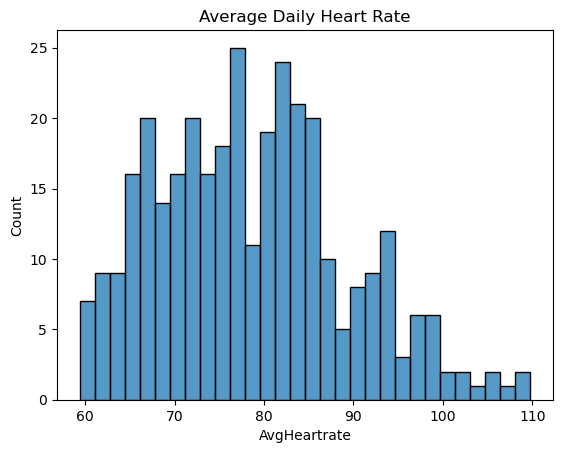

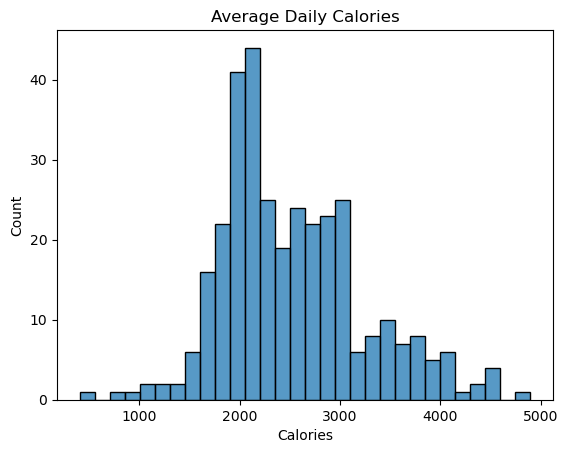

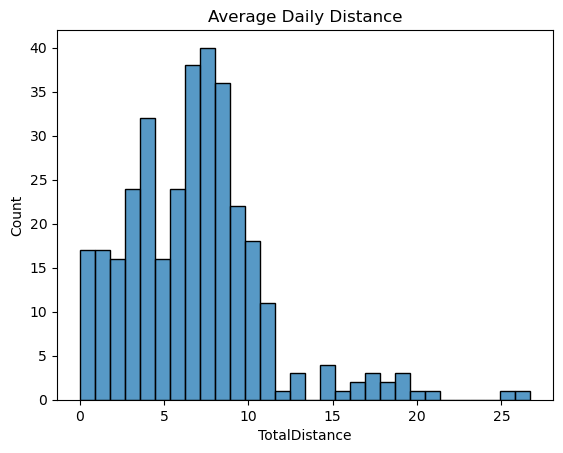

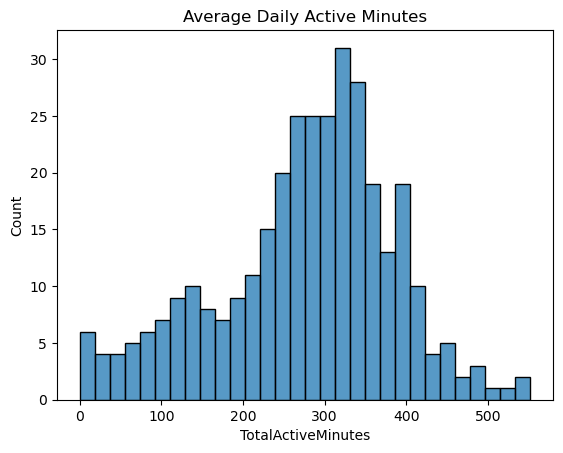

In [31]:
sns.histplot(daily_activity_and_heartrate['TotalSteps'], bins=30)
plt.title('Average Daily Steps')
plt.show()

sns.histplot(daily_activity_and_heartrate['AvgHeartrate'], bins=30)
plt.title('Average Daily Heart Rate')
plt.show()

sns.histplot(daily_activity_and_heartrate['Calories'], bins=30)
plt.title('Average Daily Calories')
plt.show()

sns.histplot(daily_activity_and_heartrate['TotalDistance'], bins=30)
plt.title('Average Daily Distance')
plt.show()

sns.histplot(daily_activity_and_heartrate['TotalActiveMinutes'], bins=30)
plt.title('Average Daily Active Minutes')
plt.show()


#### Scatterplots between daily average heartrate and features:

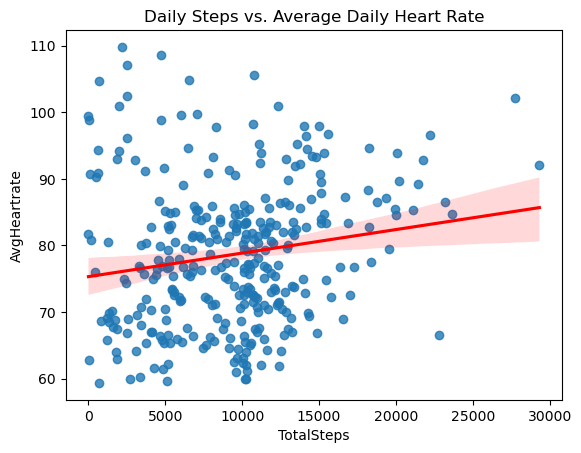

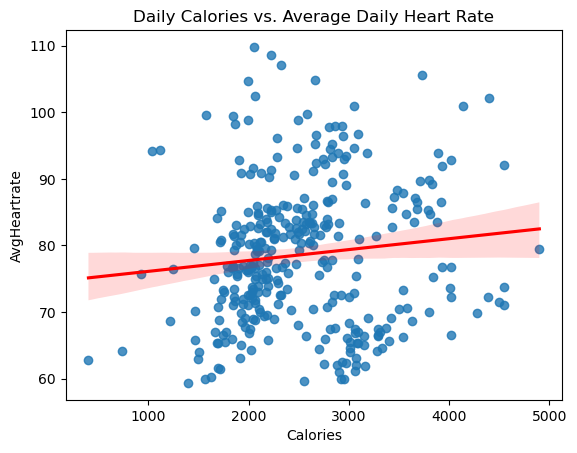

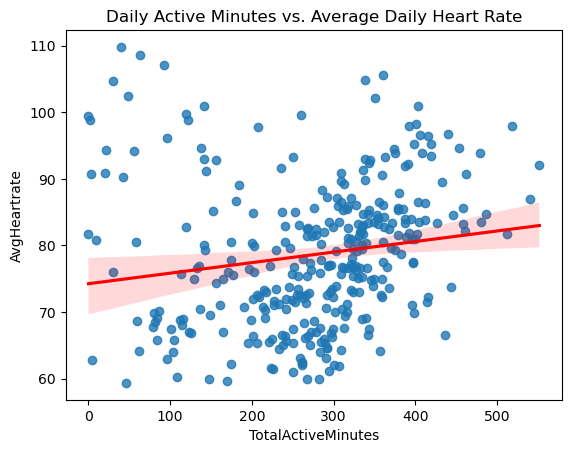

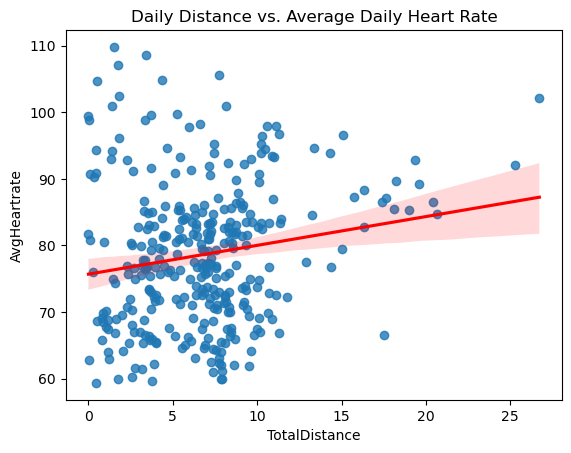

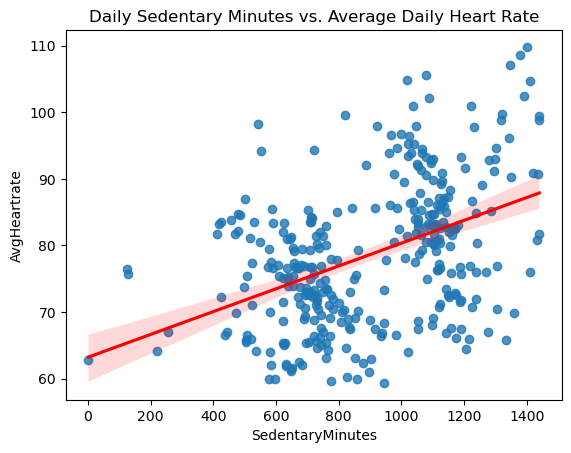

In [39]:
sns.regplot(x='TotalSteps', y='AvgHeartrate', data=daily_activity_and_heartrate, line_kws={'color': 'red'})
plt.title('Daily Steps vs. Average Daily Heart Rate')
plt.show()

sns.regplot(x='Calories', y='AvgHeartrate', data=daily_activity_and_heartrate, line_kws={'color': 'red'})
plt.title('Daily Calories vs. Average Daily Heart Rate')
plt.show()

sns.regplot(x='TotalActiveMinutes', y='AvgHeartrate', data=daily_activity_and_heartrate, line_kws={'color': 'red'})
plt.title('Daily Active Minutes vs. Average Daily Heart Rate')
plt.show()

sns.regplot(x='TotalDistance', y='AvgHeartrate', data=daily_activity_and_heartrate, line_kws={'color': 'red'})
plt.title('Daily Distance vs. Average Daily Heart Rate')
plt.show()

sns.regplot(x='SedentaryMinutes', y='AvgHeartrate', data=daily_activity_and_heartrate, line_kws={'color': 'red'})
plt.title('Daily Sedentary Minutes vs. Average Daily Heart Rate')
plt.show()



#### Correlation

In [162]:
features= ['TotalSteps', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LoggedActivitiesDistance', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'AvgHeartrate', 'TotalActiveMinutes', 'ActivityRatio']

correlation_data = daily_activity_and_heartrate[features]
correlation_data.head()

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LoggedActivitiesDistance,LightlyActiveMinutes,SedentaryMinutes,Calories,AvgHeartrate,TotalActiveMinutes,ActivityRatio
0,11875,8.34,3.31,0.77,4.26,0.0,42,14,0.0,227,1157,2390,75.804177,283,0.196528
1,12024,8.50,2.99,0.10,5.41,0.0,43,5,0.0,292,1100,2601,80.337584,340,0.236111
2,10690,7.50,2.48,0.21,4.82,0.0,32,3,0.0,257,1148,2312,72.628597,292,0.202778
3,11034,8.03,1.94,0.31,5.78,0.0,27,9,0.0,282,1122,2525,80.437382,318,0.220833
4,10100,7.09,3.15,0.55,3.39,0.0,41,11,0.0,151,1237,2177,75.960547,203,0.140972


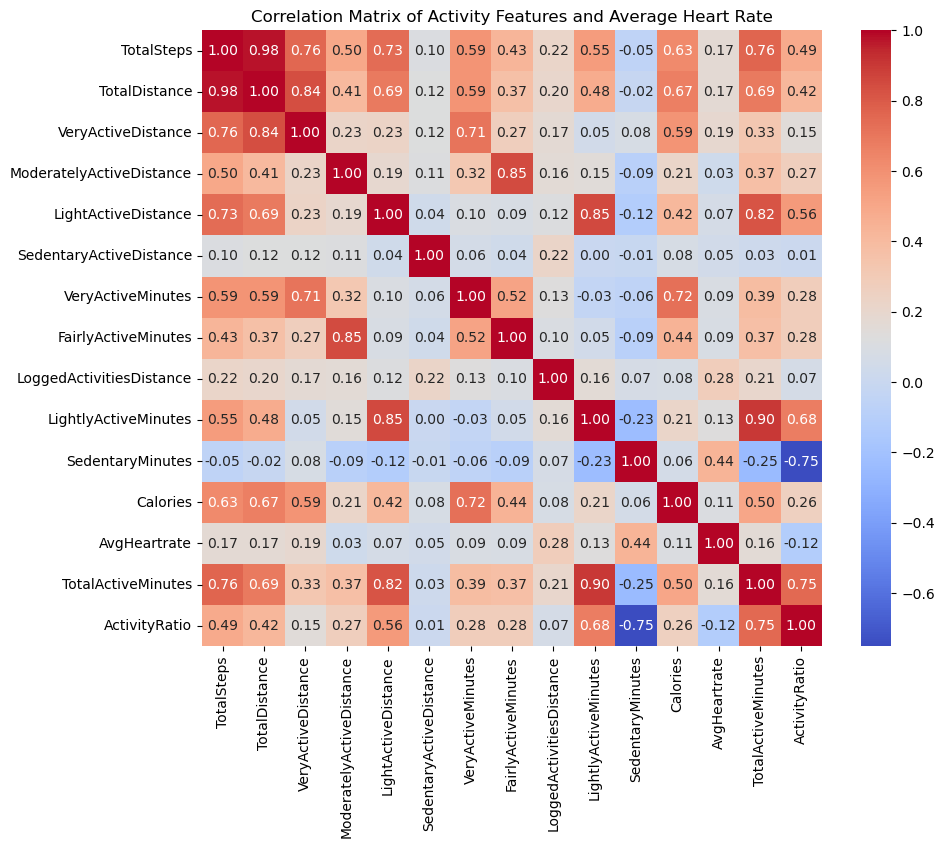

In [163]:
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Activity Features and Average Heart Rate')
plt.show()

As we can observe, the highest correlation coefficient that AvgHeartrate has with respect to another variable is (approximately) 0.44 with the variable SedentaryMinutes. Which indicates that an individual whose activity is mainly sedentary, has a higher propension to a high heartrate due to its untrained body.

According to the correlation matrix, LoggedActiveDistance also seems to have certain correlation with AvgHeartrate (0.28).

Apart from those, there is no other considerable correlation between AvgHeartrate and the rest of the variables.

## 3.3: Regression model:

### 3.3.1: Model implementation

In [47]:
X = daily_activity_and_heartrate.drop(["AvgHeartrate"], axis=1)
y = daily_activity_and_heartrate["AvgHeartrate"]

In [170]:
from sklearn.ensemble import RandomForestRegressor

def transform_data(X: pd.DataFrame) -> pd.DataFrame:
   
    X_new = X.copy()

    features_of_interest = ['TotalSteps', 'LoggedActivitiesDistance', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'Calories', 'TotalActiveMinutes', 'ActivityRatio']
    X_new = (X_new[features_of_interest]) 
    X_new.fillna(X_new.mode().iloc[0], inplace= True)

    for feature in features_of_interest:
        if feature not in X_new:
            X_new.drop(columns=feature, inplace=True)

    return X_new

def best_prediction_model(X: pd.DataFrame, y: pd.Series):

    model = RandomForestRegressor()
    model.fit(X, y)
    
    return model

The model used is the random forest regressor, which is very robust against overfitting, allowing the inclusion of many features, from which the model will randomly select many subsets to obtain the most efficient one.

The model also checks for NA values, which are replaced by the feature's mode, and drops any feature of interest which does not appear in the dataframe.

### 3.3.2: Model evaluation

In [181]:
import time
from sklearn.model_selection import train_test_split

def rmsle(actual, predicted):
  
    actual = np.array(actual)
    predicted = np.array(predicted)

    log_true = np.log1p(actual)
    log_pred = np.log1p(predicted)

    squared_log_diff = np.square(log_true - log_pred)
    mean_squared_log_diff = np.mean(squared_log_diff)

    return np.sqrt(mean_squared_log_diff)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

t0 = time.perf_counter()
best = best_prediction_model(transform_data(X_train), y_train)
predicted = best.predict(transform_data(X_test))
t1 = time.perf_counter()
print(f"Your model took {t1-t0:.4} seconds to be trained.\n")

result = round(rmsle(y_test, predicted), 6)
print("RMSE on test set:", result)

Your model took 0.4707 seconds to be trained.

RMSE on test set: 0.088036


## 3.4: Conclusion

The RMSE obtained by the test is satisfactory enough to state that the implemented model can accurately predict the average heart rate.

Despite there is no high correlation between the label and the features individually, a set of well-chosen features can manage to accurately predict AvgHeartrate, proving that there is a high correlation between daily activity levels and heartrate.